## **Chap05 Interpolate**

#### **0.插值定义**
**插值:数据分析中逼近的一种方法,利用它可以通过函数在有限各点处的取值状况,估算出函数在其它点的近似**

(人话:在已知一些离散数据点的基础上,把这些点“连接起来”，并且估算出在这些连接线上的其他点的数值。)

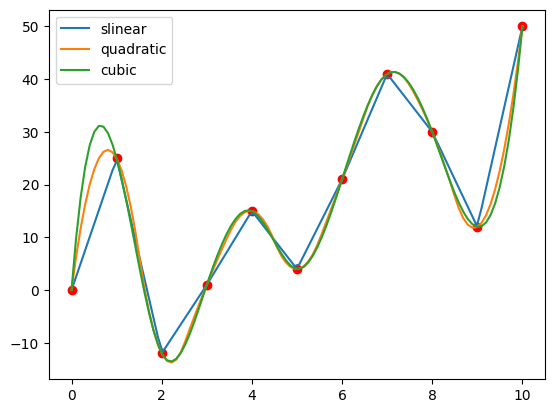

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import interpolate
from torch.distributed.rpc import new_method

n = 10 # 点的个数
# x = np.linspace(0,10,n) # 表示在[0,10]之间创建10个均匀分布的数组x
# y = np.sin(x) + np.random.rand(n) * 5 # 计算对应的正弦值(在加上生成的包含10个随机数的数组)

# 上面的代码被下面覆盖了!!!
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,25,-12,1,15,4,21,41,30,12,50]
# 表示在[0,10]之间创建100个均匀分布的数组x(可视化效果)
x_new = np.linspace(0,10,100)


fig = plt.figure()
plt.plot(x,y,"ro")
for kind in["slinear","quadratic","cubic"]:
    f = interpolate.interp2d(x,y,kind=kind)
    # 可视化效果
    y_new = f(x_new)
    plt.plot(x_new,y_new,label=str(kind))

plt.legend()
plt.show()

15


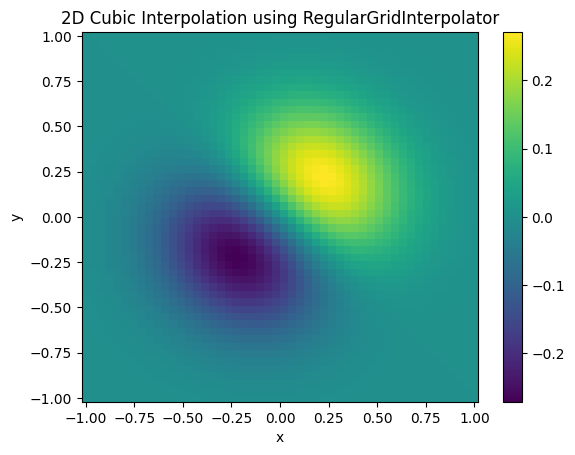

In [6]:
# 二维插值
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

def func(x,y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))

# X-Y轴分为15*15的网格
y,x = np.mgrid[-1:1:15j,-1:1:15j]
# 计算每个网格点上的函数值15*15的值
fvals = func(x,y)
print(len(fvals[0]))
points = (x[0,:], y[:,0])
newfunc = interpolate.RegularGridInterpolator(points, fvals, method='cubic')


# 现在你可以使用 newfunc 对新的点进行插值
x_new = np.linspace(-1, 1, 50)
y_new = np.linspace(-1, 1, 50)
x_grid_new, y_grid_new = np.meshgrid(x_new, y_new)

# 使用插值函数计算新的函数值
points_new = np.stack((x_grid_new.ravel(), y_grid_new.ravel()), axis=-1)
fvals_new = newfunc(points_new).reshape(x_grid_new.shape)

# 绘制结果
plt.figure()
plt.pcolormesh(x_new, y_new, fvals_new, shading='auto')
plt.colorbar()
plt.title("2D Cubic Interpolation using RegularGridInterpolator")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# 牛顿法


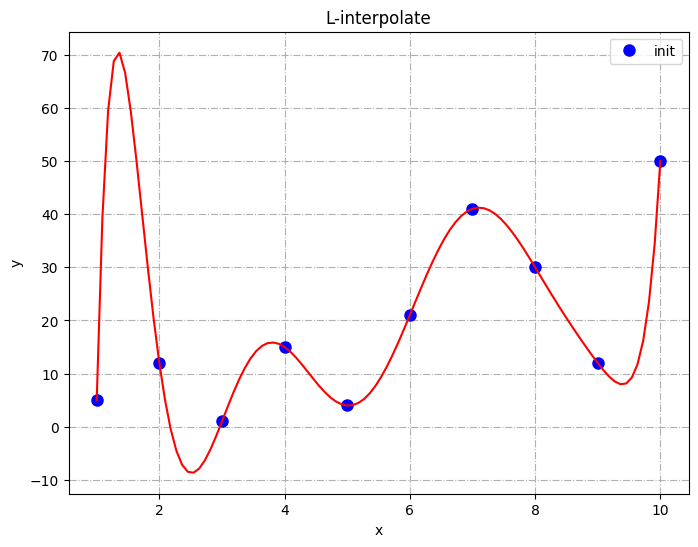

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def lagrange_interpolation(x, y, x_new):
    n = len(x)
    y_new = []
    for val in x_new:
        lagrange_poly = 0
        for i in range(n):
            term = y[i]
            for j in range(n):
                if i != j:
                    term = term * (val - x[j]) / (x[i] - x[j])
            lagrange_poly += term
        y_new.append(lagrange_poly)
    return np.array(y_new)
# 已知的离散点
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([5, 12, 1, 15, 4, 21, 41, 30, 12, 50])
# 需要插值的新 x 坐标
x_new = np.linspace(min(x), max(x), 100)
# 进行拉格朗日插值
y_new = lagrange_interpolation(x, y, x_new)
# 绘制结果
plt.figure(figsize=(8, 6))
plt.plot(x, y, "bo", markersize=8, label="init")
plt.plot(x_new, y_new, "r-")
plt.title('L-interpolate')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-.')
plt.legend()
plt.show()